<a href="https://colab.research.google.com/github/aditi14534/EDA_Datasets/blob/main/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [ ]:
df1 = pd.read_csv("/content/2015.csv")

In [ ]:
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df2 = pd.read_csv("/content/2019.csv")

In [ ]:
df2.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df = pd.concat([df1, df2], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Overall rank                   156 non-null    flo

In [ ]:
df.shape

(158, 21)

In [ ]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Dystopia Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,1.0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2.70201,2.0,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,2.49204,3.0,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,2.46531,4.0,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2.45176,5.0,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
df.isna().sum()

,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Standard Error,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0


In [ ]:
# Fill missing values in numerical columns with mean
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# Fill missing values in categorical columns with mode
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

# Verify if missing values are filled
print(df.isna().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Overall rank                     0
Country or region                0
Score                            0
GDP per capita                   0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Generosity                       0
Perceptions of corruption        0
dtype: int64


Univariate analysis On Numerical columns

<Axes: ylabel='Frequency'>

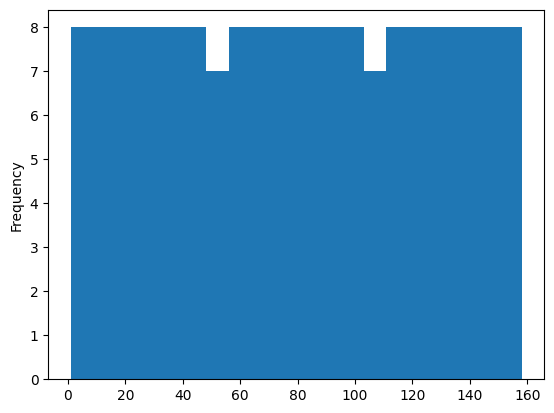

In [ ]:
df['Happiness Rank'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

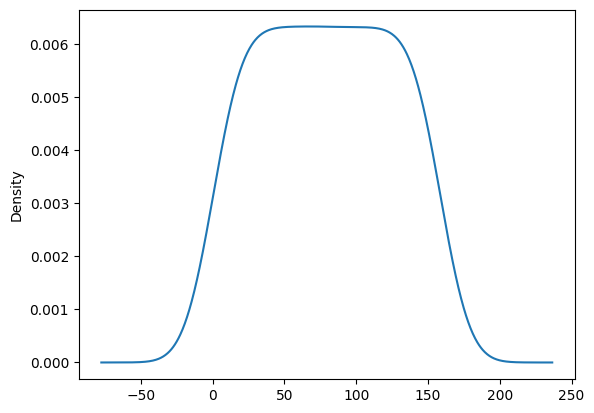

In [ ]:
df['Happiness Rank'].plot(kind='kde')

In [ ]:
df['Happiness Rank'].skew()


0.00041846932380538553

<Axes: >

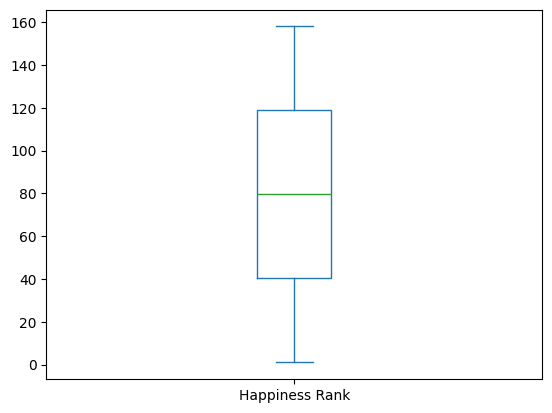

In [ ]:
df['Happiness Rank'].plot(kind='box')

In [ ]:
df['Economy (GDP per Capita)'].isnull().sum()

0

<Axes: ylabel='Frequency'>

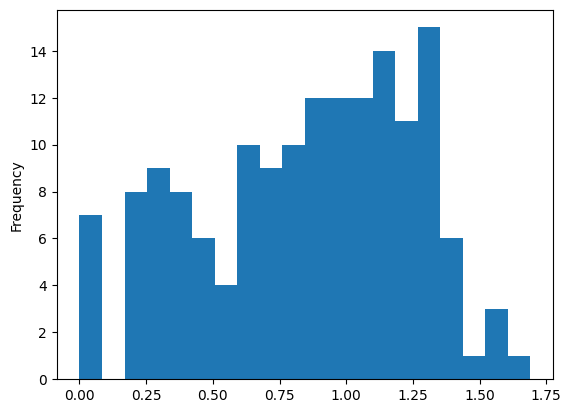

In [ ]:
df['Economy (GDP per Capita)'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

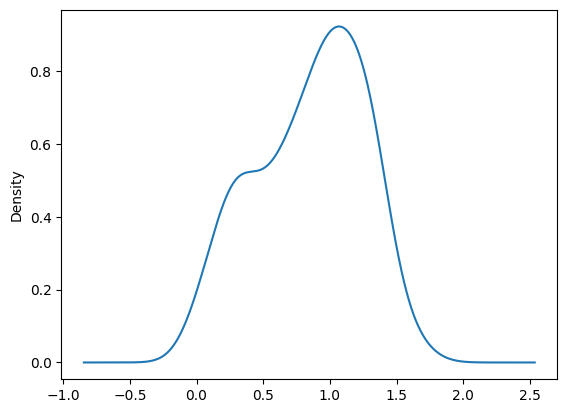

In [ ]:
df['Economy (GDP per Capita)'].plot(kind='kde')

In [ ]:
df['Economy (GDP per Capita)'].skew()

-0.3175746523312048

<Axes: >

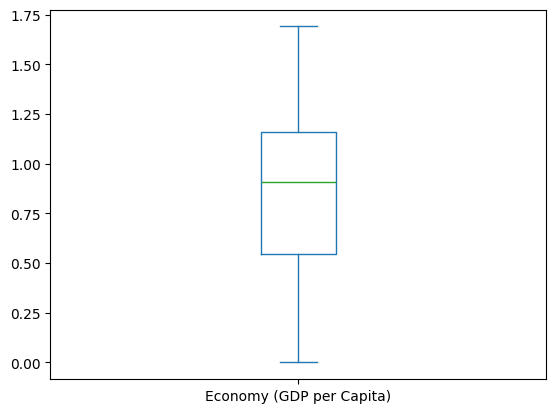

In [ ]:
df['Economy (GDP per Capita)'].plot(kind='box')

In [ ]:
df['Freedom'].isnull().sum()

0

<Axes: ylabel='Frequency'>

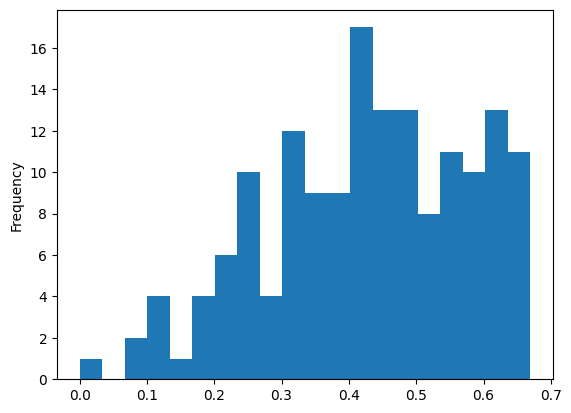

In [ ]:
df['Freedom'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

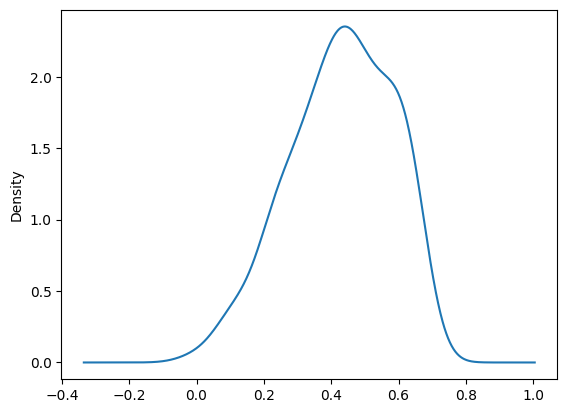

In [ ]:
df['Freedom'].plot(kind='kde')

In [ ]:
df['Freedom'].skew()

-0.41346197289710274

<Axes: >

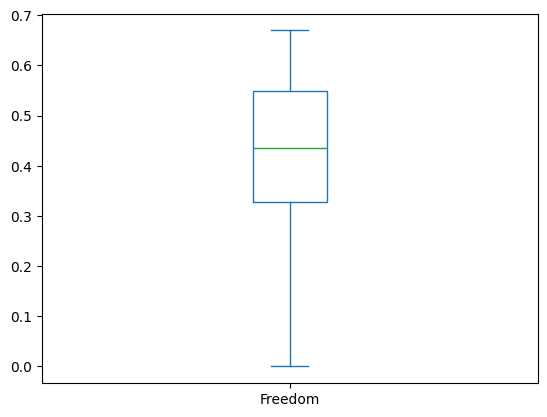

In [ ]:
df['Freedom'].plot(kind='box')

In [ ]:
df['Perceptions of corruption'].isnull().sum()

2

<Axes: ylabel='Frequency'>

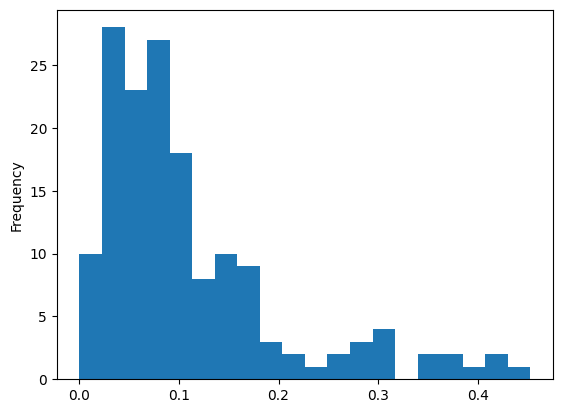

In [ ]:
df['Perceptions of corruption'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

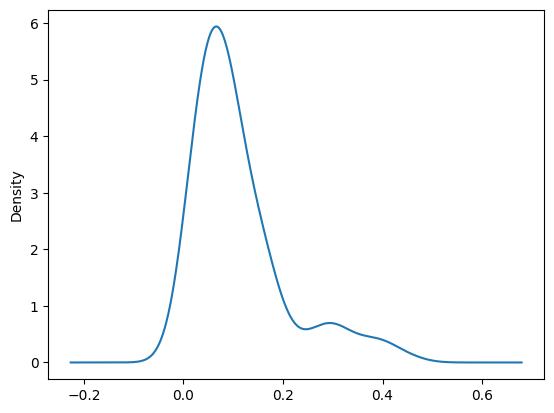

In [ ]:
df['Perceptions of corruption'].plot(kind='kde')

In [ ]:
df['Perceptions of corruption'].skew()

1.6504096361326526

<Axes: >

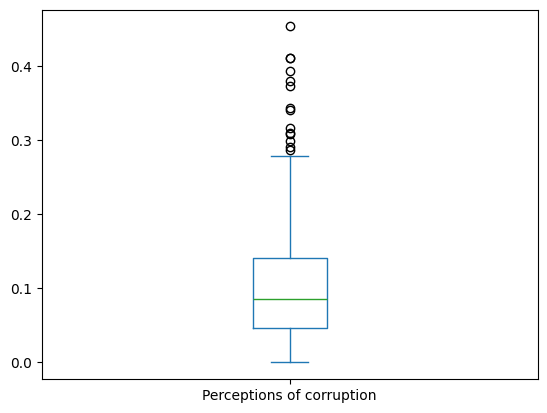

In [ ]:
df['Perceptions of corruption'].plot(kind='box')

<Axes: ylabel='Frequency'>

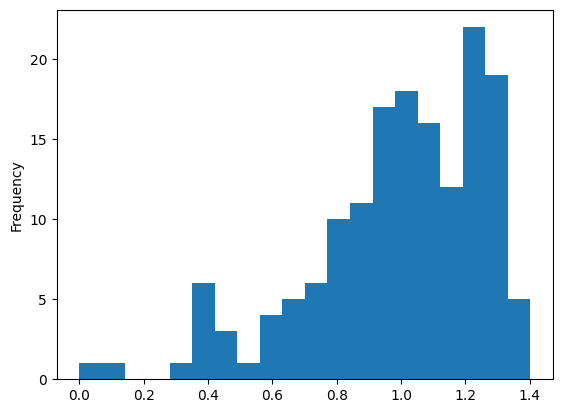

In [ ]:
df['Family'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

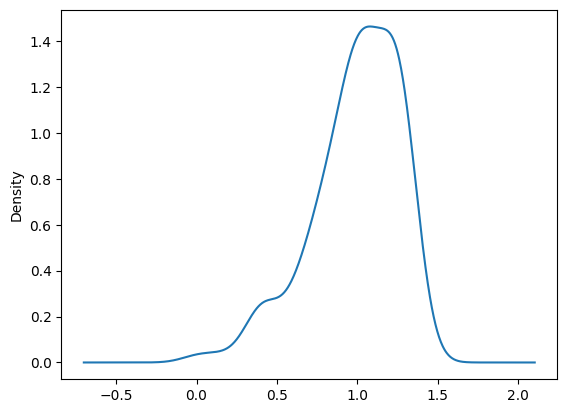

In [ ]:
df['Family'].plot(kind='kde')

In [ ]:
df['Family'].skew()

-1.0068931265421133

<Axes: >

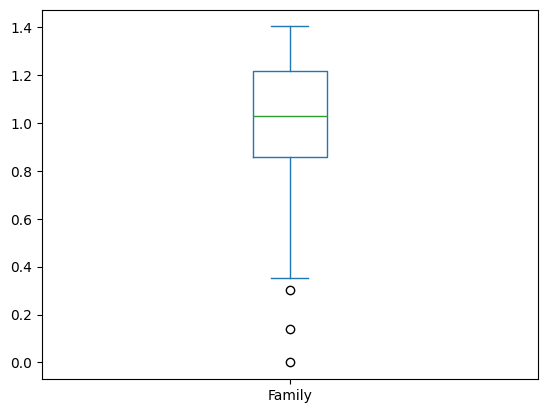

In [ ]:
df['Family'].plot(kind='box')

Univariate Analysis on Categorical Columns

<ipython-input-10-dedd67cc83a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Region', data=df, order=df['Region'].value_counts().index, palette='viridis')


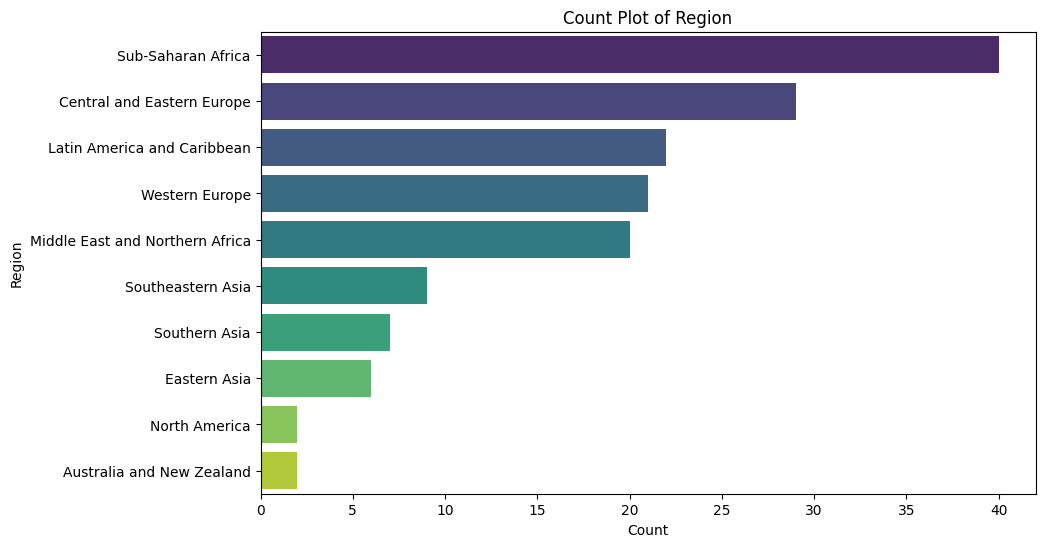

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Region', data=df, order=df['Region'].value_counts().index, palette='viridis')
plt.title('Count Plot of Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


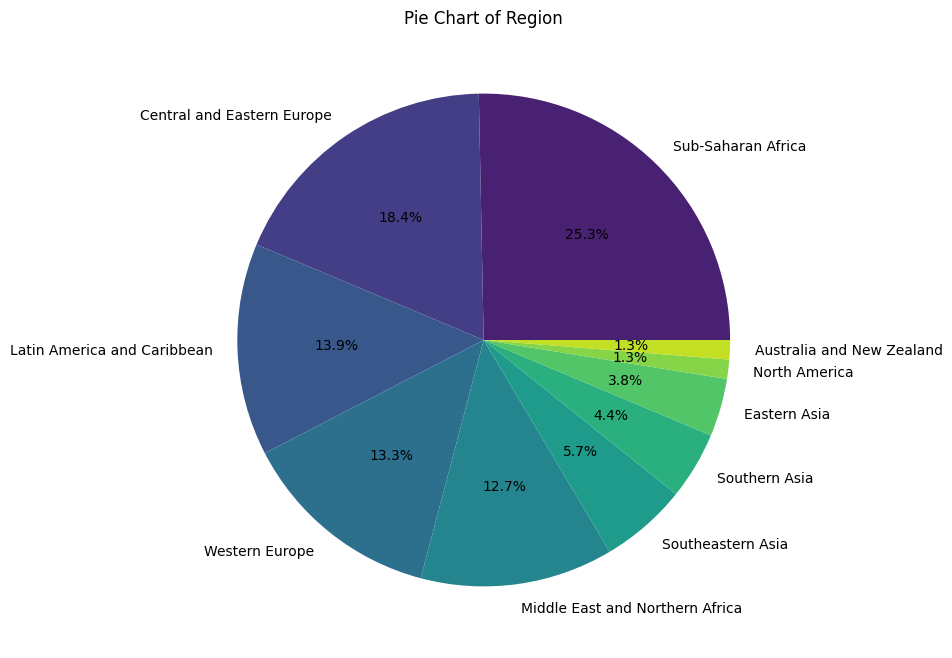

In [ ]:
plt.figure(figsize=(8, 8))
df['Region'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', len(df['Region'].unique())))
plt.title('Pie Chart of Region')
plt.ylabel('')
plt.show()


Bivariate analysis

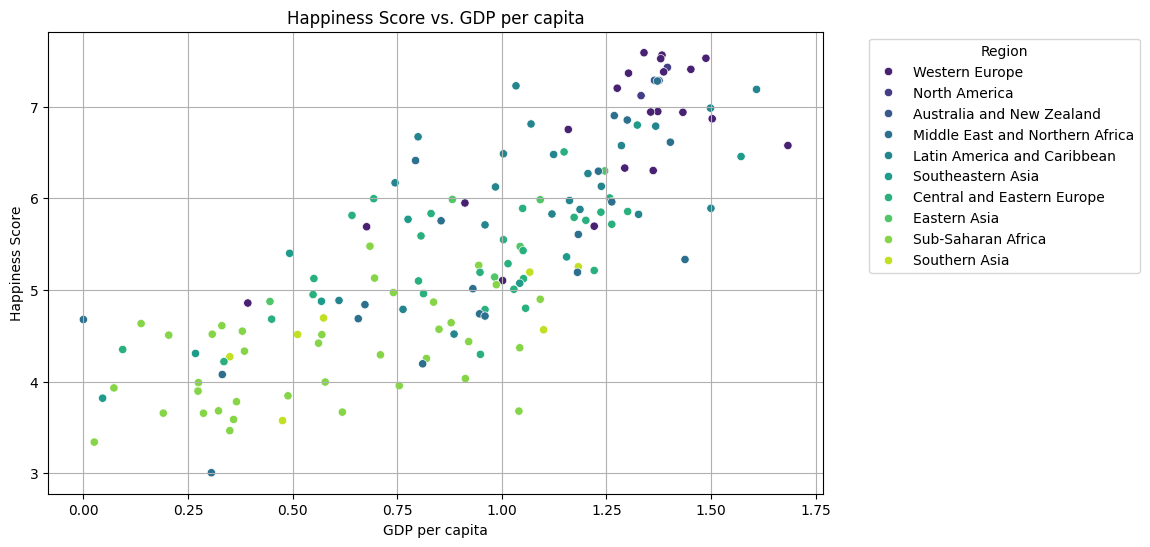

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Happiness Score', data=df, hue='Region', palette='viridis')
plt.title('Happiness Score vs. GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


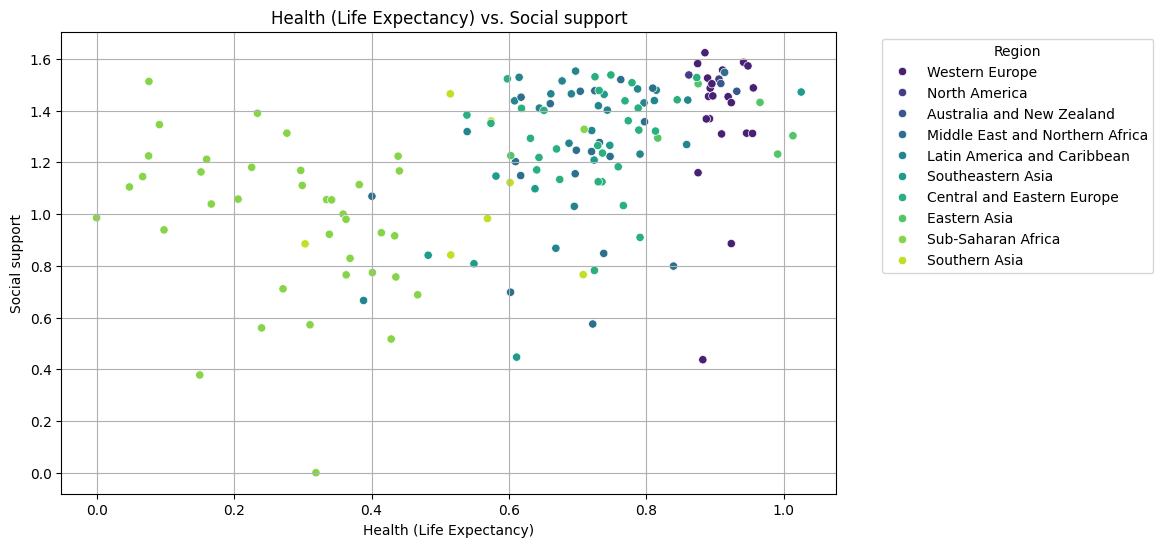

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Health (Life Expectancy)', y='Social support', data=df, hue='Region', palette='viridis')
plt.title('Health (Life Expectancy) vs. Social support')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Social support')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<ipython-input-18-cbbcc36b6d19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Happiness Score', data=df, palette='viridis')


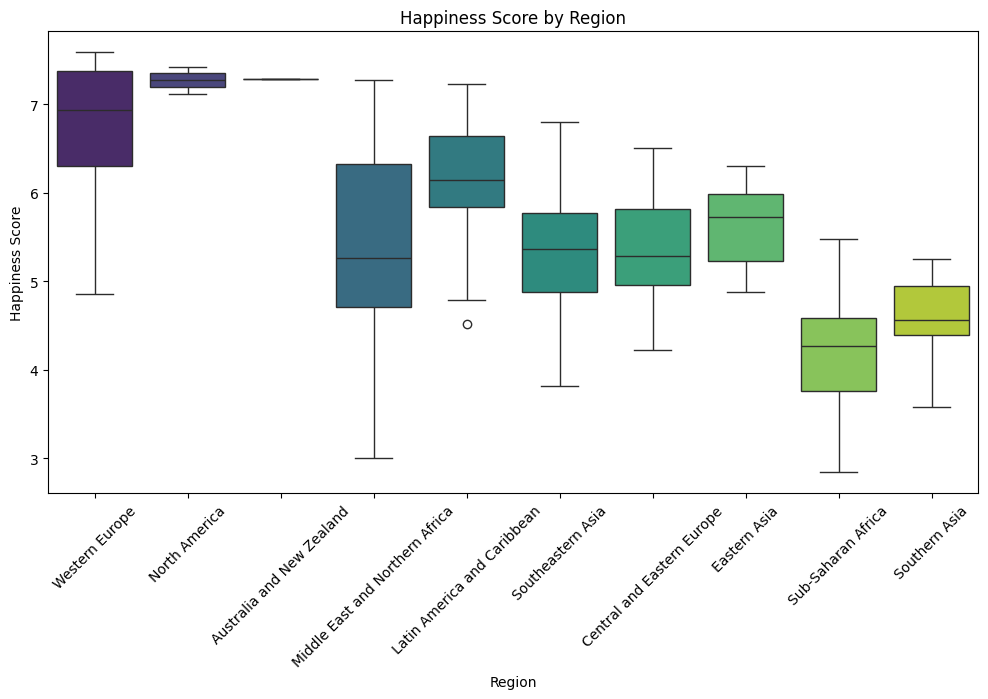

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Happiness Score', data=df, palette='viridis')
plt.title('Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()


<ipython-input-20-256acf6451c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='GDP per capita', data=df, palette='viridis')


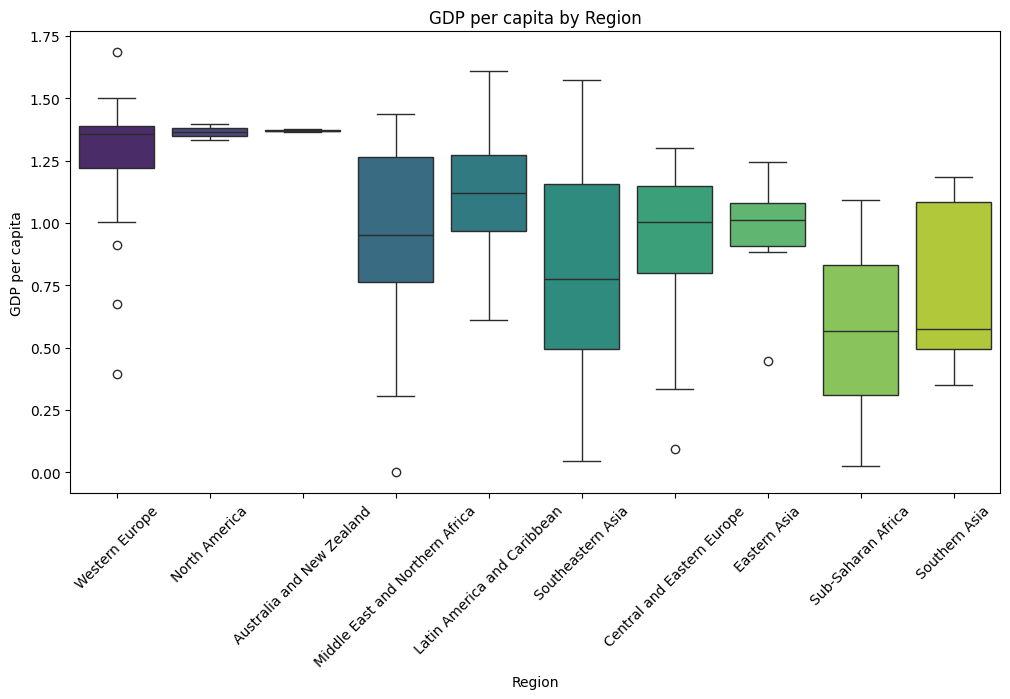

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='GDP per capita', data=df, palette='viridis')
plt.title('GDP per capita by Region')
plt.xlabel('Region')
plt.ylabel('GDP per capita')
plt.xticks(rotation=45)
plt.show()


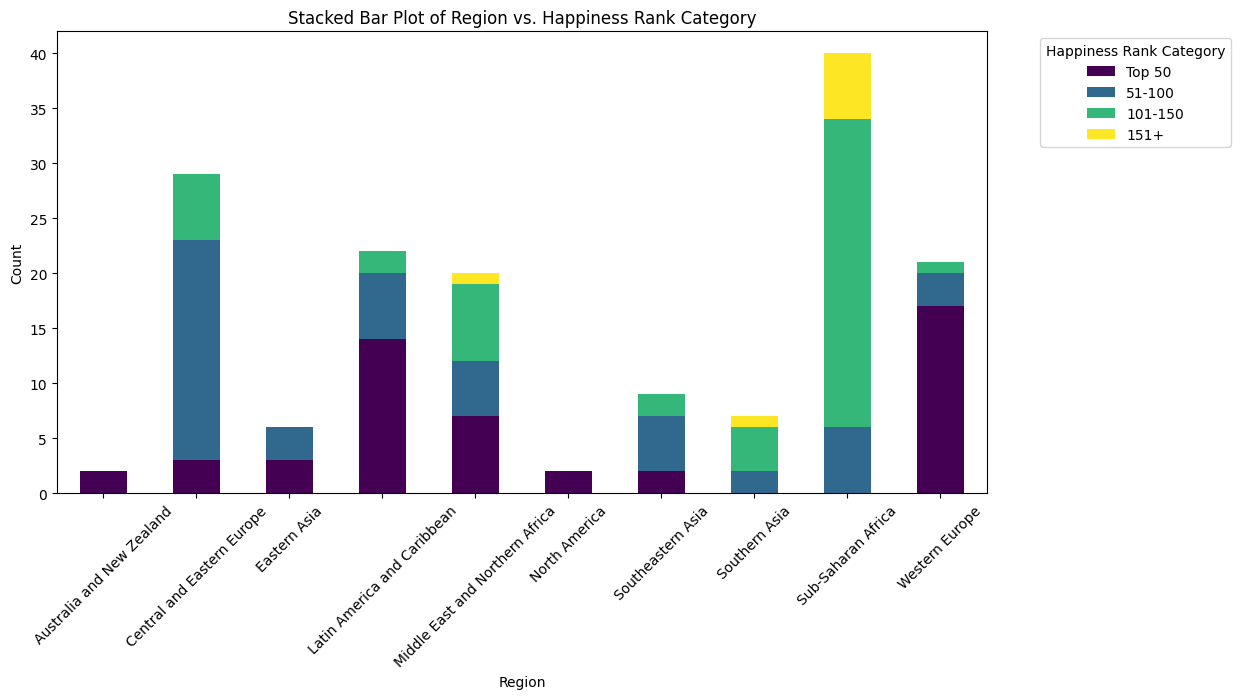

In [ ]:
bins = [0, 50, 100, 150, 200]
labels = ['Top 50', '51-100', '101-150', '151+']
df['Rank Category'] = pd.cut(df['Happiness Rank'], bins=bins, labels=labels)
region_rank = pd.crosstab(df['Region'], df['Rank Category'])
region_rank.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Stacked Bar Plot of Region vs. Happiness Rank Category')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Happiness Rank Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


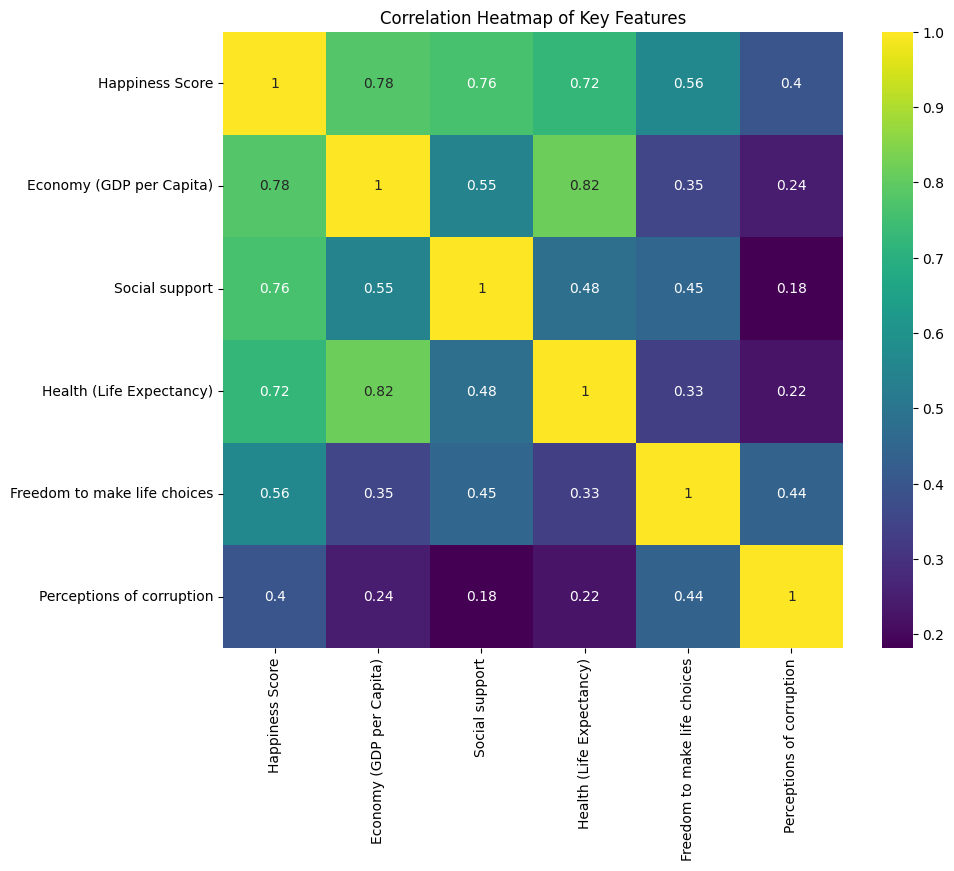

In [ ]:
selected_columns = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Social support',
    'Health (Life Expectancy)',
    'Freedom to make life choices',
    'Perceptions of corruption'
]
corr_matrix = df[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Key Features')
plt.show()


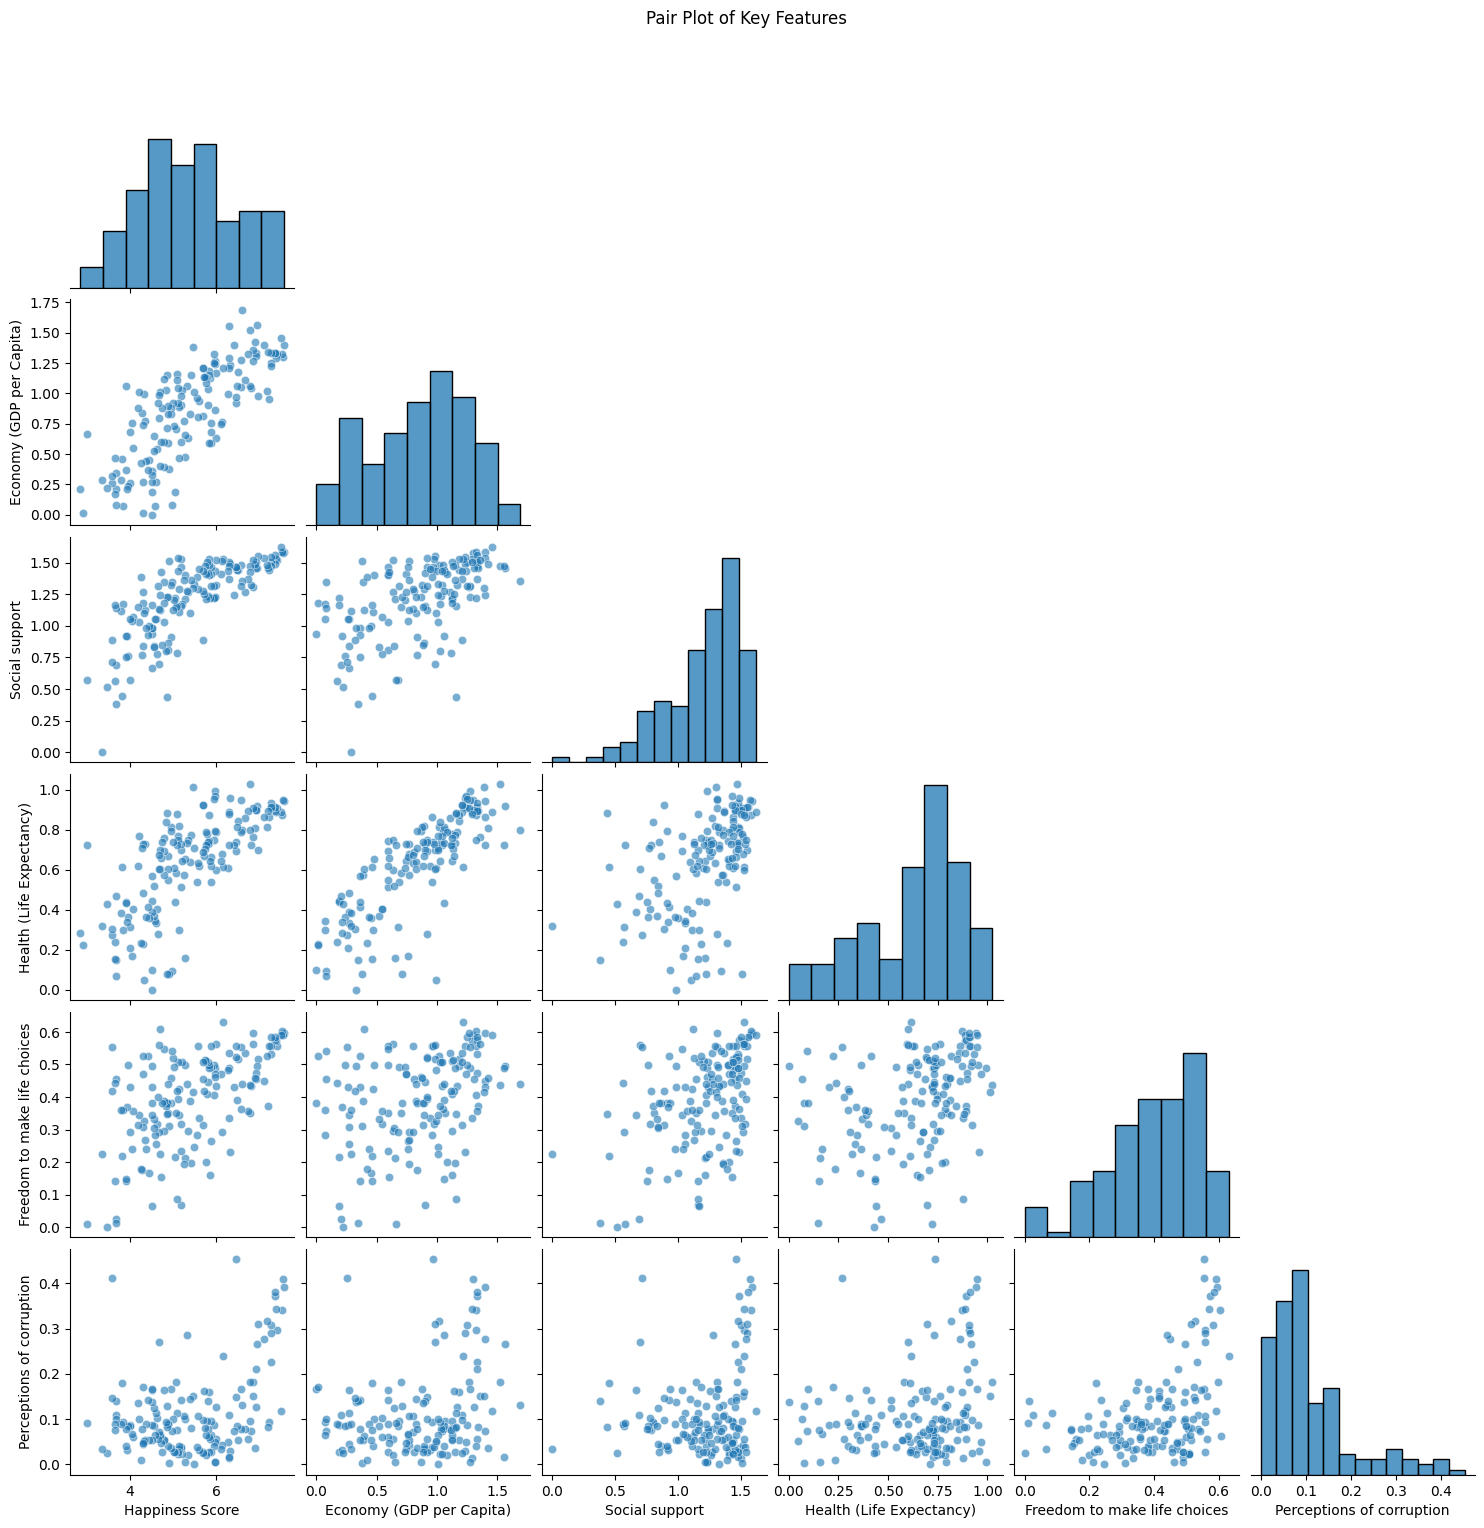

In [ ]:
selected_columns = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Social support',
    'Health (Life Expectancy)',
    'Freedom to make life choices',
    'Perceptions of corruption'
]
sns.pairplot(df[selected_columns], corner=True, plot_kws={'alpha':0.6})
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


In [ ]:
X = df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)',
      ]]

y = df['Happiness Score']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.10400460109425552
R2 Score: 0.9266928268457533


In [ ]:
new_country = [[1.2, 1.1, 0.9, 0.5, 0.2, 2.3]]
predicted_score = model.predict(new_country)
print("Predicted Happiness Score:", predicted_score[0])

Predicted Happiness Score: 6.601147
